## 환경설정

In [188]:
!pip install koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

koreanize_matplotlib 테스트

<Axes: title={'center': '한글 테스트'}>

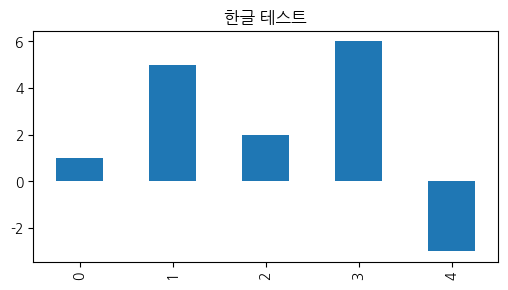

In [190]:
plt.figure(figsize=(6, 3))
plt.title('한글 테스트')
pd.Series([1, 5, 2, 6, -3]).plot.bar()

## json파일 불러오기

In [191]:
url = 'https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
print(url)

https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json


In [192]:
df = pd.read_json(url)

In [193]:
df.shape

(45678, 7)

In [194]:
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25


### 제목 중복체크

In [195]:
df.duplicated(subset=['title']).sum()

0

### 결측치 확인

In [196]:
df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45678 entries, 0 to 45677
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   guid                      45678 non-null  object
 1   title                     45678 non-null  object
 2   predefined_news_category  45678 non-null  object
 3   label                     45678 non-null  object
 4   annotations               45678 non-null  object
 5   url                       45678 non-null  object
 6   date                      45678 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


### 제목의 길이

In [198]:
df['title'].str.len()

0        26
1        23
2        27
3        31
4        30
         ..
45673    28
45674    30
45675    32
45676    29
45677    32
Name: title, Length: 45678, dtype: int64

In [199]:
# 파생컬럼 추가
df['title_len'] = df['title'].str.len()

***
### ★★ 토큰 갯수 (단어의 갯수) ★★
***

In [200]:
df['title'].str.split()

0                [유튜브, 내달, 2일까지, 크리에이터, 지원, 공간, 운영]
1                     [어버이날, 맑다가, 흐려져…남부지방, 옅은, 황사]
2               [내년부터, 국가RD, 평가, 때, 논문건수는, 반영, 않는다]
3        [김명자, 신임, 과총, 회장, 원로와, 젊은, 과학자, 지혜, 모을, 것]
4          [회색인간, 작가, 김동식, 양심고백, 등, 새, 소설집, 2권, 출간]
                            ...                    
45673          [사우디, 아람코, 주요, 석유시설·유전, 드론, 공격에, 화재]
45674      [박기원, 감독, 눈치, 보지, 말고…비예나, 눈치, 본, 건, 아닌데]
45675     [아시안게임, 첫, 경기, 앞둔, 라건아, 인도네시아, 팬이라도, ...]
45676        [트럼프, 미중, 무역협상, 1단계, 합의, 서명식, 가질, 것종합]
45677     [극적, 역전승, 도로공사, GS칼텍스, 꺾고, 2년, 연속, 챔프...]
Name: title, Length: 45678, dtype: object

In [201]:
df['title'].str.split().str.len()

0         7
1         5
2         7
3        10
4         9
         ..
45673     7
45674     9
45675     8
45676     8
45677     8
Name: title, Length: 45678, dtype: int64

In [202]:
# 파생컬럼 추가
df['title_count'] = df['title'].str.split().str.len()

In [203]:
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5


In [204]:
df[['title_len', 'title_count']].describe()

,title_len,title_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


array([[<Axes: title={'center': 'title_len'}>,
        <Axes: title={'center': 'title_count'}>]], dtype=object)

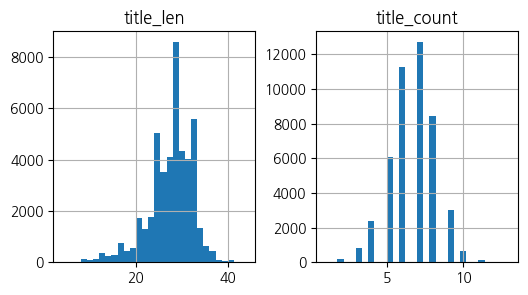

In [205]:
df[['title_len', 'title_count']].hist(figsize=(6,3), bins=30)

In [206]:
#가장 긴 제목 찾기
filt = df['title_len'] == df['title_len'].max()

In [207]:
df[filt]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


## Word_Colud 깃허브

https://github.com/amueller/word_cloud

In [208]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [209]:
from wordcloud import WordCloud

### 한글 폰트 설치

In [210]:
# wordcloud 한글이 깨져서 한글폰트 설치
font_path = r'c:\windows\Fonts\malgun.ttf'

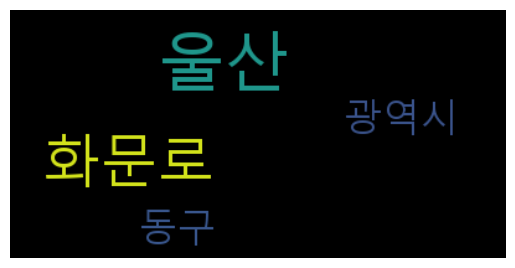

In [211]:
wordcloud = WordCloud(font_path).generate('울산 광역시 동구 화문로 화문로 화문로 울산 울산 울산')
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

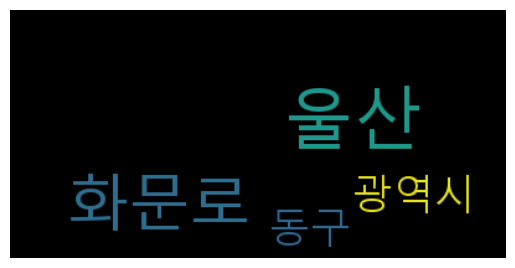

In [212]:
wordcloud = WordCloud(
    font_path,
    random_state=2024
).generate('울산 광역시 동구 화문로 화문로 화문로 울산 울산 울산')
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

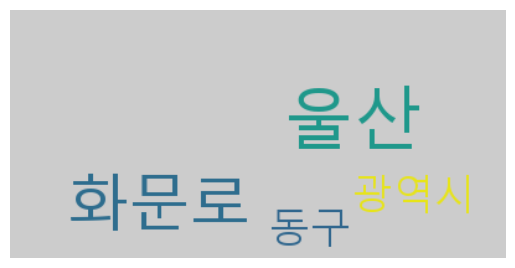

In [213]:
wordcloud = WordCloud(
    font_path,
    random_state=2024,
    background_color='#ccc'
).generate('울산 광역시 동구 화문로 화문로 화문로 울산 울산 울산')
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

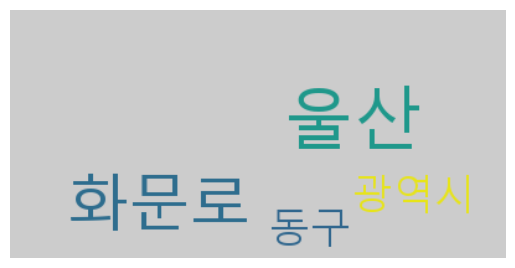

In [214]:
wordcloud = WordCloud(
    font_path,
    random_state=2024,
    background_color='#ccc',
    stopwords=['kh'], # 불용어 제거
).generate('kh 울산 광역시 동구 화문로 화문로 화문로 울산 울산 울산')
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 함수로 변경

In [215]:
stopwords = ['kh', '첫', '등']

def display_word_cloud(data,/,*, width=1200, height=500, stopwords=[]):
    wordcloud = WordCloud(
        width=width,
        height=height,
        font_path=font_path,
        random_state=2024,
        background_color='#ccc',
        stopwords=stopwords # 불용어 제거
    ).generate(data)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### 제목컬럼 하나의 문자열로 만들기

In [216]:
news_title = " ".join(df['title'])
news_title[:200]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 야외서 생방송 하세요…액션캠 전용 요금제 잇따라 월드컵 태극전사 16강 전초기지 레오강 입성종합 미세먼지'

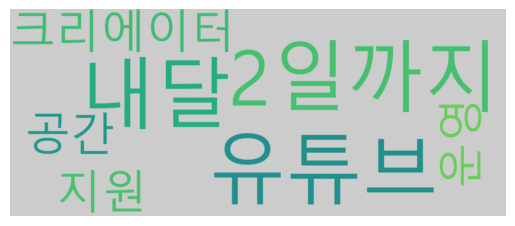

In [217]:
display_word_cloud(df['title'][0])

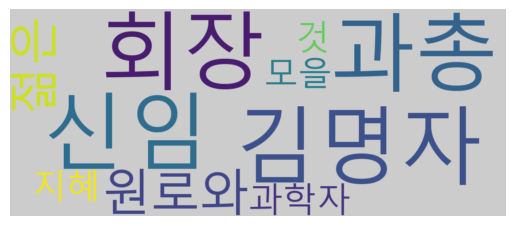

In [218]:
display_word_cloud(df['title'][3])

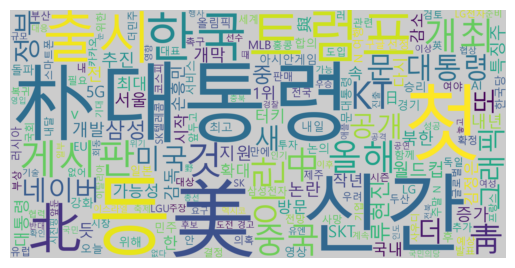

In [219]:
display_word_cloud(news_title, width= 2000, height= 1000)

In [220]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [221]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

### 세계 분야에서만

In [222]:
filter = df['label']=='세계'

subject_title = " ".join(df.loc[filter, 'title'])
subject_title[:200]

'왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보 베트남 경제 고성장 지속…2분기 GDP 6.71% 성장 그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원 美 베네수엘라 구호품 반입 촉구 안보리 결의 추진 파키스탄 경제난 속 카타르서 30억 달러 투자 유치 일본 예산팽창에 재정건전성 우려…내년에 장기채무 GDP 2배 칠레 민중가수 살해하고'

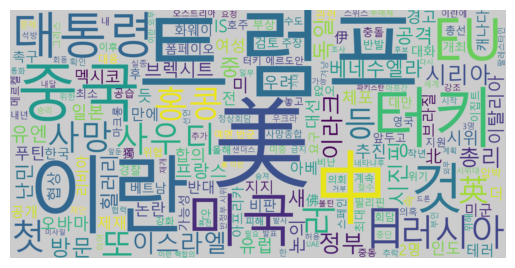

In [223]:
display_word_cloud(subject_title, width= 2000, height= 1000)

### 생활문화에서만

In [224]:
filter = df['label']=='생활문화'

subject_title2 = " ".join(df.loc[filter, 'title'])
subject_title2[:200]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 미세먼지 속 출근길 예스24 독자들이 선정한 올해의 책 여행의 이유 울산 오후 4시 건조주의보 디자인 역사의 기둥 100권의 잡지를 돌아보다 전국 곳곳에 저녁까지 비·강한 바람…낮 최고 27도 황사·미세먼지 기승'

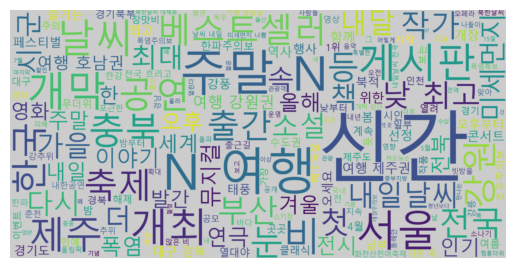

In [225]:
display_word_cloud(subject_title2, width= 2000, height= 1000)

## 정규표현식

In [226]:
# 숫자 제거 [0-9], \d, [^0-9], \D
# 문자만 남기기 [^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]

In [227]:
df['title2'] = df['title'].str.replace(r'\d', '', regex=True) # 숫자만 제거
df['title3'] = df['title'].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]', ' ', regex=True) # 숫자, 특수문자 제거
df['title4'] = df['title'].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', regex=True) # 한글만 남기기

In [228]:
df[['title', 'title2', 'title3']].head()

,title,title2,title3
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간


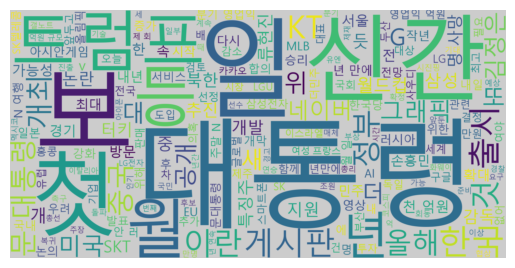

In [229]:
display_word_cloud(' '.join(df['title3']), width=2000, height=1000)

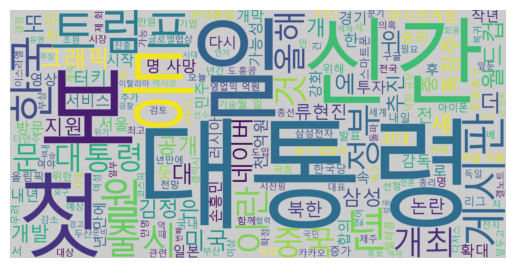

In [230]:
display_word_cloud(' '.join(df['title4']), width=2000, height=1000)

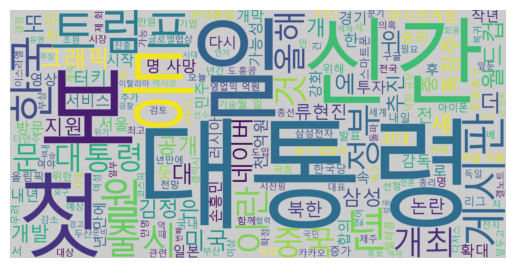

In [231]:
filter = df['label']=='세계'

subject_title4 = " ".join(df.loc[filter, 'title4'])
display_word_cloud(' '.join(df['title4']), width=2000, height=1000)

## 문장 중에 의미있는 것을 뽑기 (품사)

### 형태소 분석기로 특정 품사만 추출하기

[hyunwoongko/pecab: Pecab: Pure python Korean morpheme analyzer based on Mecab](https://github.com/hyunwoongko/pecab)

In [232]:
!pip install pecab

Defaulting to user installation because normal site-packages is not writeable


In [233]:
from pecab import PeCab

In [234]:
# 긴 제목 가져오기
filt = df['title_len'] == df['title_len'].max()
df.loc[filt, 'title']

5792     美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보
20168    그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위
28257    주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비
30493    MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매
Name: title, dtype: object

In [235]:
df.loc[20168, 'title']

'그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위'

In [236]:
pecab = PeCab()
pecab.nouns(df.loc[20168, 'title'])

['그래픽', '네이처', '세계', '연구', '기관', '년', '평가', '발표', '서울대', '국내', '위', '세계', '위']

### label이 사회 인거

In [237]:
# 사회 부문 기사제목 1000건 무작위 추출
df.loc[df['label'] == '사회'].sample(1000)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count,title2,title3,title4
18633,ynat-v1_train_18633,당첨 취소 아파트 4채 가족 명의 계약한 공무원 2심도 무죄,사회,사회,"{'annotators': ['13', '08', '02'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.09.19. 오후 5:21,33,10,당첨 취소 아파트 채 가족 명의 계약한 공무원 심도 무죄,당첨 취소 아파트 채 가족 명의 계약한 공무원 심도 무죄,당첨 취소 아파트 채 가족 명의 계약한 공무원 심도 무죄
11642,ynat-v1_train_11642,언론중재위 미투 선정적 보도 112건 시정권고,사회,사회,"{'annotators': ['02', '07', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.02. 오전 11:38,25,6,언론중재위 미투 선정적 보도 건 시정권고,언론중재위 미투 선정적 보도 건 시정권고,언론중재위 미투 선정적 보도 건 시정권고
21338,ynat-v1_train_21338,한국 사계절 담는다…관광공사 홍보영상 제작,생활문화,사회,"{'annotators': ['07', '09', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.10.24. 오후 3:03,23,5,한국 사계절 담는다…관광공사 홍보영상 제작,한국 사계절 담는다 관광공사 홍보영상 제작,한국 사계절 담는다 관광공사 홍보영상 제작
30851,ynat-v1_train_30851,성 추문 만화가 박재동 피해자에 사과…책임지겠다,생활문화,사회,"{'annotators': ['10', '12', '09'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.28. 오후 8:23,26,6,성 추문 만화가 박재동 피해자에 사과…책임지겠다,성 추문 만화가 박재동 피해자에 사과 책임지겠다,성 추문 만화가 박재동 피해자에 사과 책임지겠다
18059,ynat-v1_train_18059,전남대 천원의 아침밥 인기,사회,사회,"{'annotators': ['18', '14', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.17. 오전 9:24,14,4,전남대 천원의 아침밥 인기,전남대 천원의 아침밥 인기,전남대 천원의 아침밥 인기
...,...,...,...,...,...,...,...,...,...,...,...,...
28624,ynat-v1_train_28624,게시판 덕성여대 SKT 0캠퍼스 가입자 비중 20% 돌파,IT과학,사회,"{'annotators': ['03', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.11.01. 오전 9:07,31,8,게시판 덕성여대 SKT 캠퍼스 가입자 비중 % 돌파,게시판 덕성여대 SKT 캠퍼스 가입자 비중 돌파,게시판 덕성여대 캠퍼스 가입자 비중 돌파
8818,ynat-v1_train_08818,장자연사건 보도 PD수첩 상대 손배소에서 조선일보 패소,사회,사회,"{'annotators': ['13', '14', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.11.20. 오전 10:12,30,7,장자연사건 보도 PD수첩 상대 손배소에서 조선일보 패소,장자연사건 보도 PD수첩 상대 손배소에서 조선일보 패소,장자연사건 보도 수첩 상대 손배소에서 조선일보 패소
26035,ynat-v1_train_26035,유영민 사람중심 4차산업혁명 구현 총력…규제 해결은 큰 과제,IT과학,사회,"{'annotators': ['03', '13', '11'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.25. 오후 5:31,33,8,유영민 사람중심 차산업혁명 구현 총력…규제 해결은 큰 과제,유영민 사람중심 차산업혁명 구현 총력 규제 해결은 큰 과제,유영민 사람중심 차산업혁명 구현 총력 규제 해결은 큰 과제
16554,ynat-v1_train_16554,홍남기 2차 공공기관 이전 검토 중…굉장히 신중한 입장,정치,사회,"{'annotators': ['03', '09', '18'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.10.10. 오후 2:01,30,8,홍남기 차 공공기관 이전 검토 중…굉장히 신중한 입장,홍남기 차 공공기관 이전 검토 중 굉장히 신중한 입장,홍남기 차 공공기관 이전 검토 중 굉장히 신중한 입장


In [238]:
# 사회 부문 기사제목 1000건 무작위 추출
# random_state를 줘서 무작위 값 고정적으로 가져오기
df_society = df.loc[df['label'] == '사회'].sample(1000, random_state=2024).copy()
df_society.shape

(1000, 12)

In [239]:
df_society['title'].head().map(lambda x: pecab.nouns(x))

10524      [송, 재, 서재필, 언론, 인상, 제정, 내달, 일, 시상식]
34438        [중소기업, 상생, 힘, 다음, 달, 네이버, 커넥트, 개]
19087                            [가지, 미스터리, 답]
31496       [국립, 여성, 사, 전시, 관장, 여성, 독립운동가, 존재]
31290    [佛, 전동, 스쿠터, 사망, 사고, 피해자, 규제, 강화, 촉구]
Name: title, dtype: object

In [240]:
# 하나의 문자열로
df_society['title'].head().map(lambda x: ' '.join(pecab.nouns(x)))

10524      송 재 서재필 언론 인상 제정 내달 일 시상식
34438       중소기업 상생 힘 다음 달 네이버 커넥트 개
19087                      가지 미스터리 답
31496      국립 여성 사 전시 관장 여성 독립운동가 존재
31290    佛 전동 스쿠터 사망 사고 피해자 규제 강화 촉구
Name: title, dtype: object

### 시간이 오래 걸리는 작업시 시각적으로 진행상황을 수치로(%) 보여준다

In [241]:
from tqdm import tqdm

In [242]:
tqdm.pandas()
df_society['title_none'] = df_society['title'].progress_map(lambda x: ' '.join(pecab.nouns(x)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.00it/s]


In [243]:
df_society[['title', 'title2', 'title3', 'title4', 'title_none']].head()

,title,title2,title3,title4,title_none
10524,송재 서재필 언론인상 제정 내달 7일 첫 시상식,송재 서재필 언론인상 제정 내달 일 첫 시상식,송재 서재필 언론인상 제정 내달 일 첫 시상식,송재 서재필 언론인상 제정 내달 일 첫 시상식,송 재 서재필 언론 인상 제정 내달 일 시상식
34438,중소기업 상생 힘쓴다…다음 달 네이버 커넥트 2017 개최,중소기업 상생 힘쓴다…다음 달 네이버 커넥트 개최,중소기업 상생 힘쓴다 다음 달 네이버 커넥트 개최,중소기업 상생 힘쓴다 다음 달 네이버 커넥트 개최,중소기업 상생 힘 다음 달 네이버 커넥트 개
19087,5·18에 관한 5가지 미스터리에 답하다,·에 관한 가지 미스터리에 답하다,에 관한 가지 미스터리에 답하다,에 관한 가지 미스터리에 답하다,가지 미스터리 답
31496,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립 여성 사 전시 관장 여성 독립운동가 존재
31290,佛 전동스쿠터 사망사고 잇따라…피해자들 규제강화 촉구,佛 전동스쿠터 사망사고 잇따라…피해자들 규제강화 촉구,전동스쿠터 사망사고 잇따라 피해자들 규제강화 촉구,전동스쿠터 사망사고 잇따라 피해자들 규제강화 촉구,佛 전동 스쿠터 사망 사고 피해자 규제 강화 촉구


In [244]:
' '.join(df_society['title_none'])

'송 재 서재필 언론 인상 제정 내달 일 시상식 중소기업 상생 힘 다음 달 네이버 커넥트 개 가지 미스터리 답 국립 여성 사 전시 관장 여성 독립운동가 존재 佛 전동 스쿠터 사망 사고 피해자 규제 강화 촉구 日 총리 관저 김복동 할머니 추모 행사 사죄 사기 안보 강사 선정 북 민 경찰 감사 청구 게시판 한국 여기자 협회 상반기 국내 연수 선정 호 특별 감찰관 시험대 직무 독립성 감찰 공정 충돌 연구비 부정 사용 의혹 서은경 창 재단 이사장 사 종합 콘크리트 건물 톈궁 호 추락 시 행동 요령 중국인 관광객 구석 아이 소변 누이 종합 통신 시설 등급 관리 미흡 개 통신사 시정 명령 검찰 전북 언론사 비리 수사 마무리 명 무더기 기소 장자연 리스트 사건 결과 보고서 김영희 홍남기 최저임금 시장 수용성 합리 결정 조직 문화 제도 개선 위원회 브리핑 野 潘 방한 제주 포럼 만찬 동석 아무 대검 진상 조사단 수첩 고발 정운천 前 장관 방문 조사 박영수 특검 파견 검사 명 합류 특수 부 중심 정예 멤버 돋보기 근절 안 적정 조처 영상 방정오 측 수첩 장자연 보도 특정 망신 노조 활동 방해 구글 직원 사찰 프로그램 논란 광주 전남 기자 협회 기자 협회 협약 카카오 사회 경제 주간 캠페인 댓글 개 원 기부 삼 부 토건 안상정 가처분 피 신청 금감원 대학 실용 금융 교육 지원 신청 접수 신림동 강간 미수 영상 속 남성 체포 주거 침입 혐의 입법 촉구 서명 전방 위 확산 현대차 대금 조기 지급 롯데 부산 지역 고교 피칭 머신 후원 검찰 기소 승인 별개 심사 시 중요 법인 폰 불법 영업 내일 처벌 수위 결정 구의역 사고 주기 스타트업 공간 김 기사 네이버 모바일 뉴스 판 언론사 편집 화면 그룹 사 일 자리 창출 유공 정부 포상 방송 독립 시민 행동 공영 방송 이사 선임 공개 검증 강원도 올림픽 이후 양양 공항 항공 수요 창출 전력 한국 언론 사표 송건호 흉상 옥천 생가 연합뉴스 사장 후보 공개 설명 빈소 마련 이용마 기자 영정 실수 장고 끝 악수 학습 효과 부산 해운대 골 목상 상

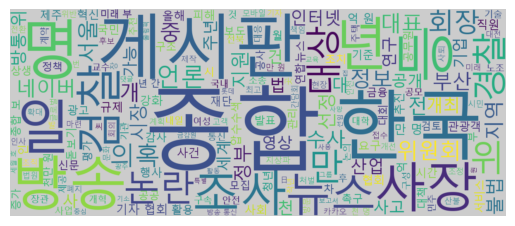

In [245]:
display_word_cloud(' '.join(df_society['title_none']))

In [246]:
dir(wordcloud)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'background_color',
 'collocation_threshold',
 'collocations',
 'color_func',
 'colormap',
 'contour_color',
 'contour_width',
 'fit_words',
 'font_path',
 'font_step',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'height',
 'include_numbers',
 'layout_',
 'margin',
 'mask',
 'max_font_size',
 'max_words',
 'min_font_size',
 'min_word_length',
 'mode',
 'normalize_plurals',
 'prefer_horizontal',
 'process_text',
 'random_state',
 'recolor',
 'regexp',
 'relative_scaling',
 'repeat',
 'scale',
 'stopwords',
 'to

In [247]:
wordcloud.words_

{'울산': 1.0, '화문로': 0.75, '광역시': 0.25, '동구': 0.25}

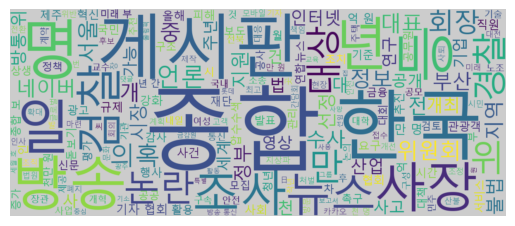

In [248]:
stopwords = ['명', '일', '년', '중', '만' '등', '위']
wordcloud_society = display_word_cloud(' '.join(df_society['title_none']))

In [250]:
wordcloud_society.words_

AttributeError: 'NoneType' object has no attribute 'words_'

In [251]:
wordcloud_society_s = pd.Series(wordcloud_society.words_)
wordcloud_society_s.sort_values(ascending=True).nlargest(30).plot.barh()

AttributeError: 'NoneType' object has no attribute 'words_'

## 이미지 워드 클라우드

In [258]:
import requests
from PIL import Image

mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지 다운로드
response = requests.get(mask_img_path)
if response.status_code == 200:
    with open('alice_mask.png', 'wb') as file:
        file.write(response.content)
        
mask_img = np.array(Image.open('alice_mask.png'))

In [259]:
print(mask_img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [260]:
mask_img.shape

(900, 900)

In [281]:
stopwords = ['첫', '의미', '등']

def display_word_cloud2(data,/,*, width=1200, height=500, stopwords=[], mask=None):
    wordcloud = WordCloud(
        width=width,
        height=height,
        font_path=font_path,
        random_state=2024,
        background_color='#ccc',
        stopwords=stopwords, # 불용어 제거
        mask=mask
    ).generate(data)


    # show
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

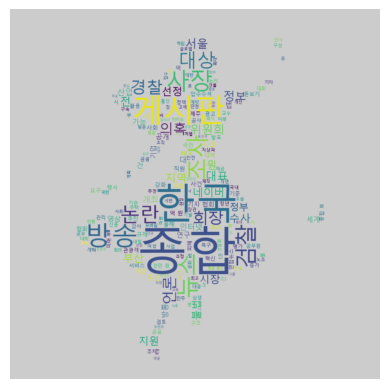

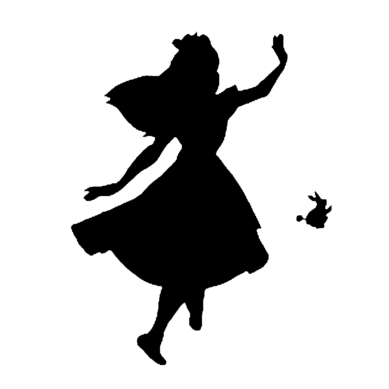

In [282]:
stopwords = ['명', '일', '년', '만', '위', '등', '천', '중', '개']
display_word_cloud2(' '.join(df_society['title_none']), stopwords=stopwords, mask=mask_img)